In [3]:
from pyopenms import *
import matplotlib.pyplot as plt
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int]  # relative intenstiy
    theo_int = [element * -1 for element in theo_int]  # invert the intensity for the mirror plot
    plt.figure(figsize=(12, 8))
    plt.bar(obs_mz, obs_int, width=3.0)
    plt.bar(theo_mz, theo_int, width=3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')
    plt.show()

In [4]:
from pyopenms import *
dig = ProteaseDigestion()
dig.getEnzymeName() 
bsa = "".join([l.strip() for l in open("SEQ.fasta").readlines()[1:]])
bsa = AASequence.fromString(bsa)
result = []
dig.digest(bsa, result)
len(result)

254

In [5]:
for s in result:
    print(s.toString())  

MDVK
ER
KPYR
SLTR
R
R
DAER
R
YTSSSADSEEGK
GPQK
SYSSSETLK
AYDQDAR
LAYGSR
VK
DMVPQEAEEFCR
TGTNFTLR
ELGLGEMTPPHGTLYR
TDIGLPHCGYSMGASSDADLEADTVLSPEHPVR
LWGR
STR
SGR
SSCLSSR
ANSNLTLTDTEHENTETDHPSSLQNHPR
LR
TPPPPLPHAHTPNQHHAASINSLNR
GNFTPR
SNPSPAPTDHSLSGEPPAGSAQEPTHAQDNWLLNSNIPLETR
NLGK
QPFLGTLQDNLIEMDILSASR
HDGAYSDGHFLFKPGGTSPLFCTTSPGYPLTSSTVYSPPPRPLPR
STFSRPAFNLK
KPSK
YCNWK
CAALSAILISATLVILLAYFVAMHLFGLNWHLQPMEGQMQMYEITEDTASSWPVPTDVSLYPSGGTGLETPDR
K
GK
GAAEGKPSSLFPEDSFIDSGEIDVGR
R
ASQK
IPPGTFWR
SQVFIDHPVHLK
FNVSLGK
AALVGIYGR
K
GLPPSHTQFDFVELLDGR
R
LLTQEAR
SLEGPQR
QSR
GPVPPSSHETGFIQYLDSGIWHLAFYNDGK
ESEVVSFLTTAIESVDNCPSNCYGNGDCISGTCHCFLGFLGPDCGR
ASCPVLCSGNGQYMK
GR
CLCHSGWK
GAECDVPTNQCIDVACSSHGTCIMGTCICNPGYK
GESCEEVDCMDPTCSSR
GVCVR
GECHCSVGWGGTNCETPR
ATCLDQCSGHGTFLPDTGLCNCDPSWTGHDCSIEICAADCGGHGVCVGGTCR
CEDGWMGAACDQR
ACHPR
CAEHGTCR
DGK
CECSPGWNGEHCTIAHYLDR
VVK
EGCPGLCNGNGR
CTLDLNGWHCVCQLGWR
GTGCDTSMETGCGDGK
DNDGDGLVDCMDPDCCLQPLCHVNPLCLGSPDPLDIIQETQAPVSQQNLNSFYDR
IK
FLVGR
DSTHSIPGENPFDGGHACVIR
G

In [6]:
listofpeptide=[]
lisofsepc=[]
for s in result:
    peptide = AASequence.fromString(s.toString())
    if(len(peptide.toString())>4):
        listofpeptide.append(peptide)    
    

In [7]:
len(listofpeptide)


155

In [8]:
import numpy as np
from matplotlib import pyplot as plt
def mirror_plot(obs_mz,obs_int,theo_mz,theo_int,title):
    obs_int=[element/max(obs_int)for element in obs_int]
    theo_int=[element*-1 for element in theo_int]
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz,obs_int,width=3.0)
    plt.bar(theo_mz,theo_int,width=3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')


# DATA FROM MOUCE 

# FIRST 10 SPEC

____________________________________________________________________________________________________
Number of matched peaks:60
ATCLDQCSGHGTFLPDTGLCNCDPSWTGHDCSIEICAADCGGHGVCVGGTCR
302.26800537109375
1599.7093505859375
____________________________________________________________________________________________________
Number of matched peaks:27
ATCLDQCSGHGTFLPDTGLCNCDPSWTGHDCSIEICAADCGGHGVCVGGTCR
226.12991333007812
1592.0269775390625
____________________________________________________________________________________________________
Number of matched peaks:34
HEENEIPSCDLSNFARPNPVVSPSPLTSFASSCAEK
244.23703002929688
1594.8323974609375
____________________________________________________________________________________________________
Number of matched peaks:26
VTSMQAVINETPLPIDLYR
226.00624084472656
1420.81298828125
____________________________________________________________________________________________________
Number of matched peaks:26
CAALSAILISATLVILLAYFVAMHLFGLNWHLQPMEGQMQMYEITED

<ipython-input-8-db2b228e7058>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,8))


Number of matched peaks:61
VTHLYNHSSSEITSLYYDLQGHLFAMELSSGDEFYIACDNIGTPLAVFSGTGLMIK
304.2834777832031
1597.9310302734375
____________________________________________________________________________________________________
Number of matched peaks:17
VDQNGIISTLLGSNDLTSARPLSCDSVMEISQVR
245.0760498046875
1639.782470703125
____________________________________________________________________________________________________
Number of matched peaks:12
VDQNGIISTLLGSNDLTSARPLSCDSVMEISQVR
366.2383728027344
1998.0841064453125
____________________________________________________________________________________________________
Number of matched peaks:28
TDIGLPHCGYSMGASSDADLEADTVLSPEHPVR
292.2586364746094
1926.6011962890625
____________________________________________________________________________________________________
Number of matched peaks:26
VAIHATLESATALAVSHNGVLYIAETDEK
287.16937255859375
1843.6578369140625
_____________________________________________________________________________________

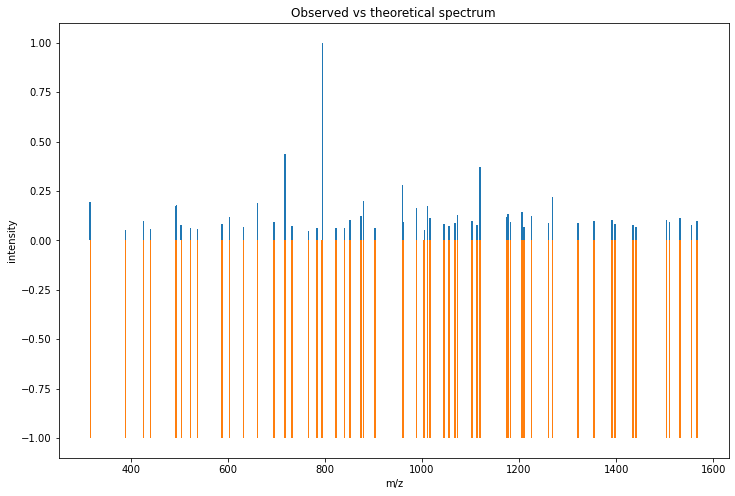

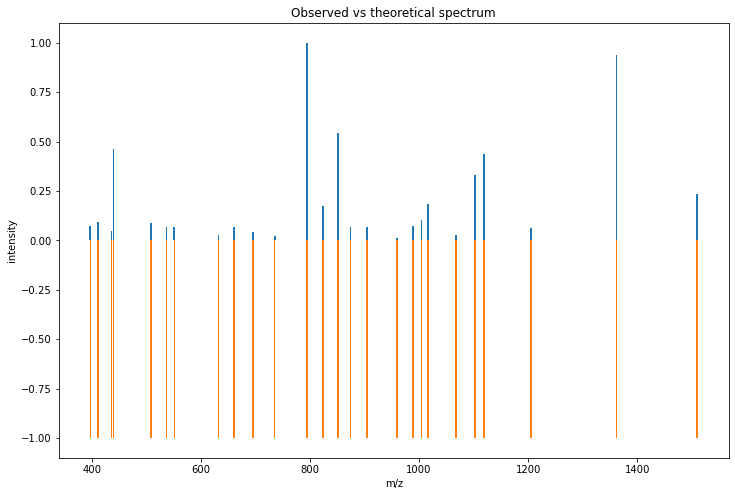

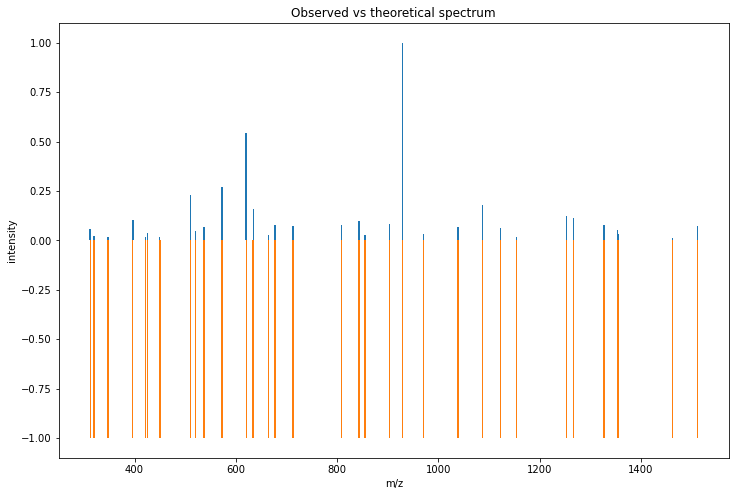

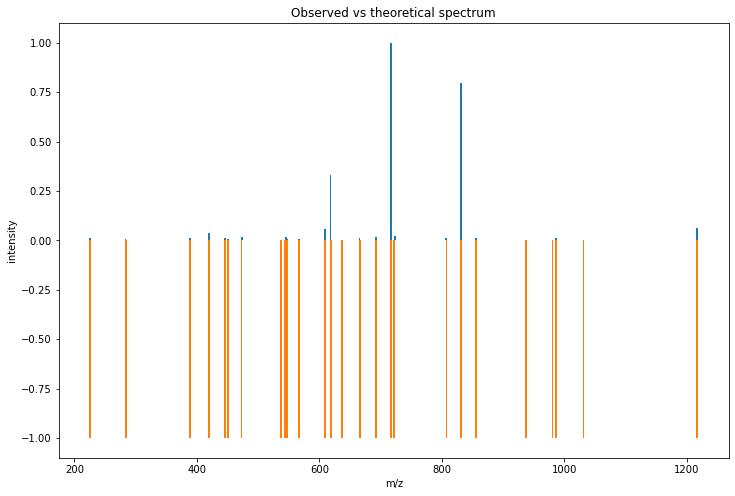

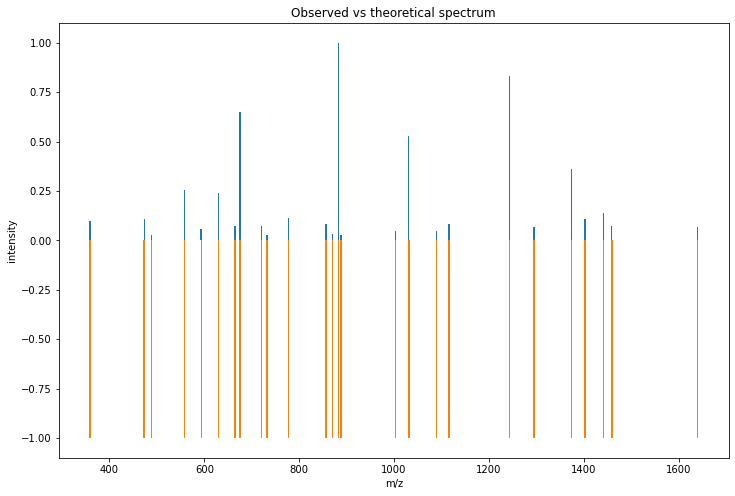

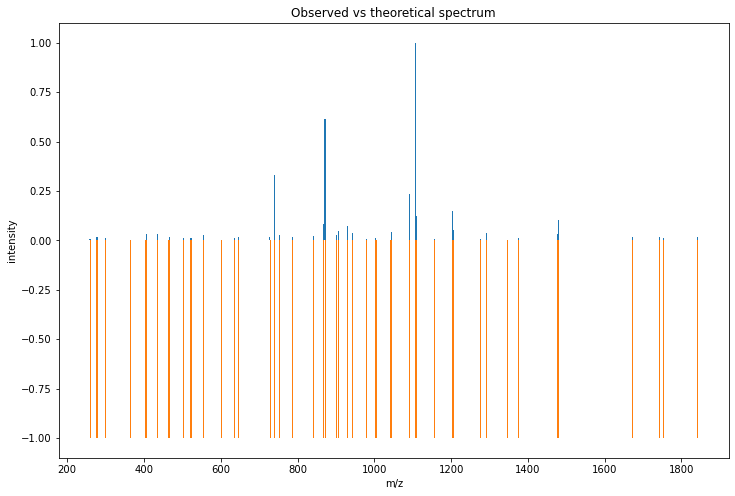

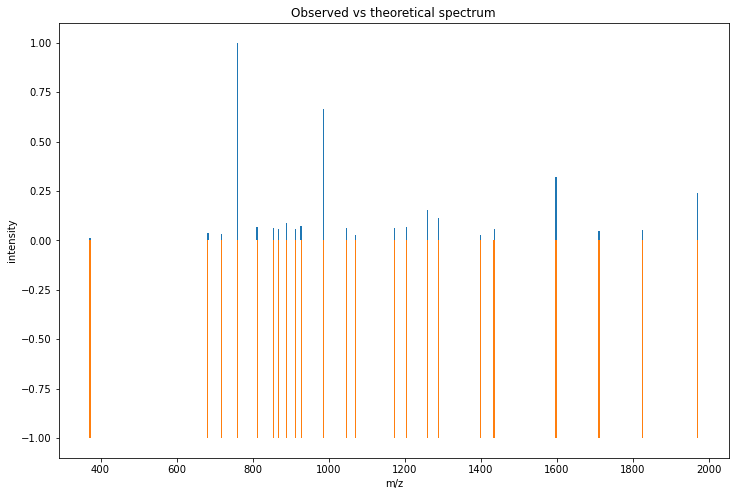

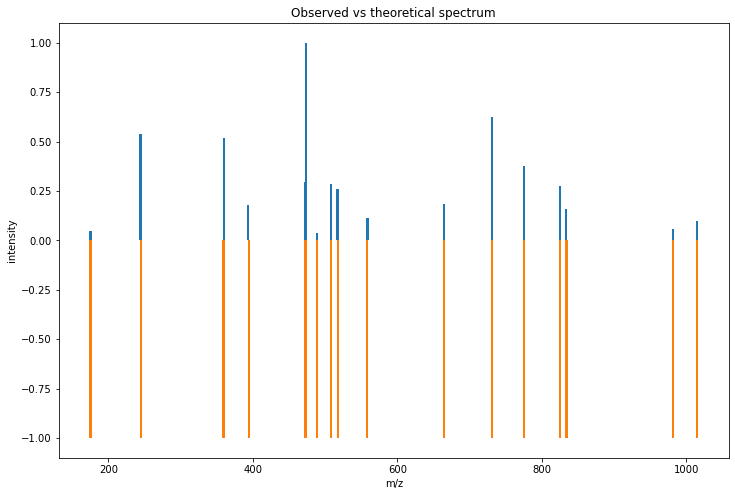

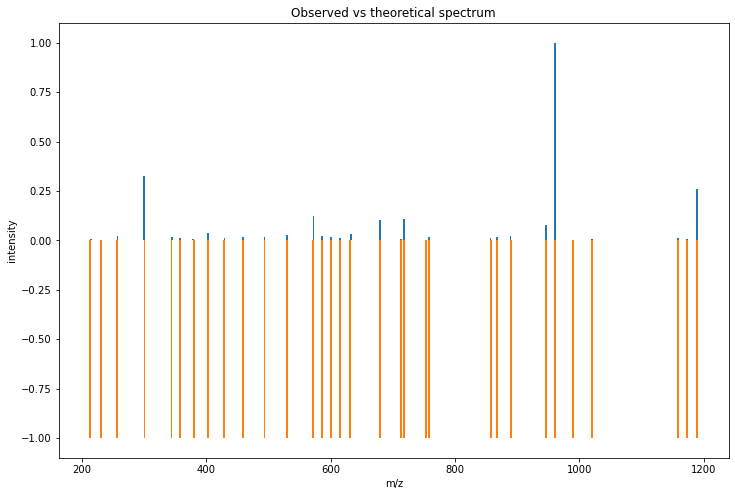

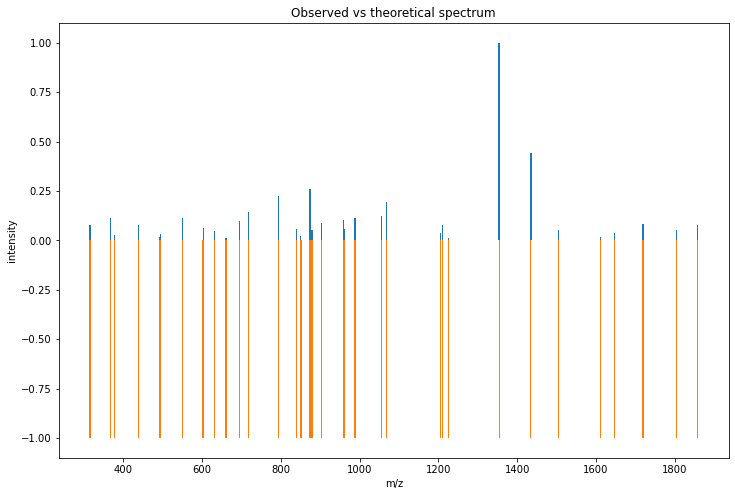

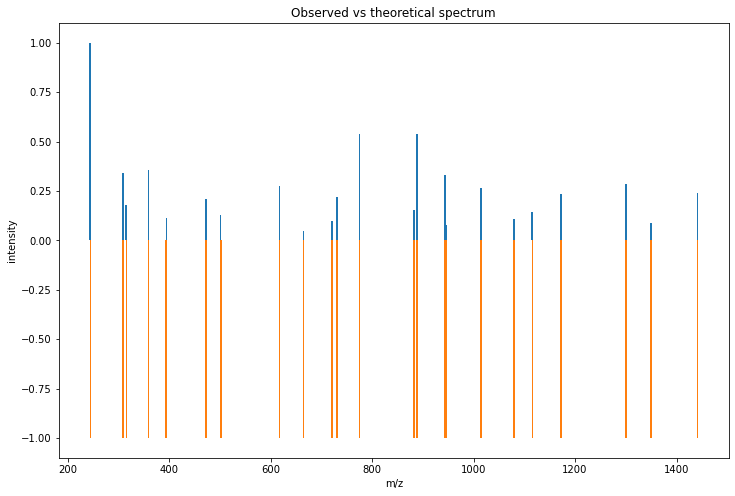

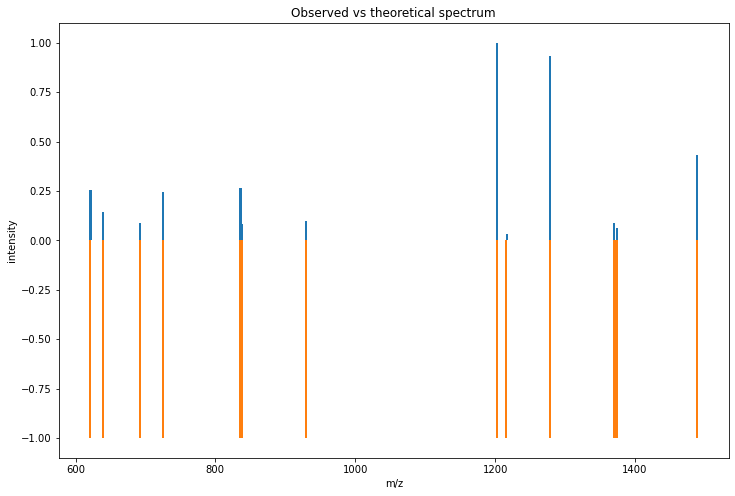

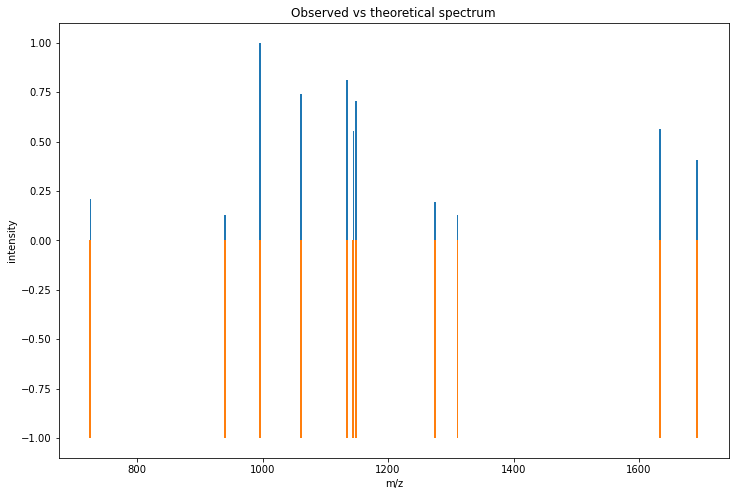

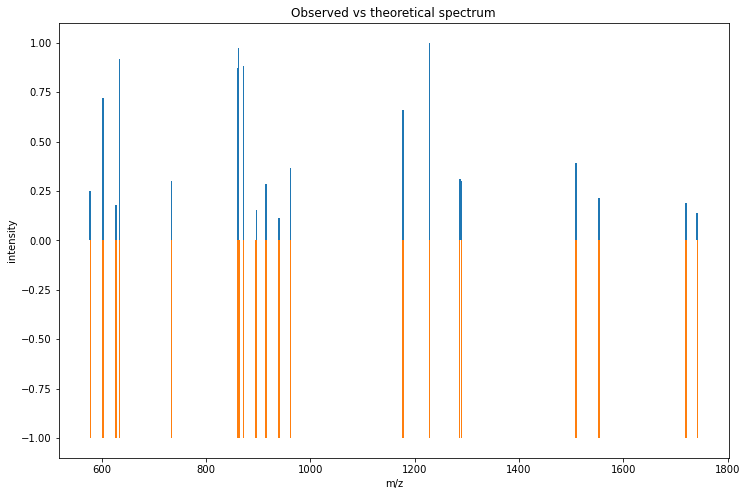

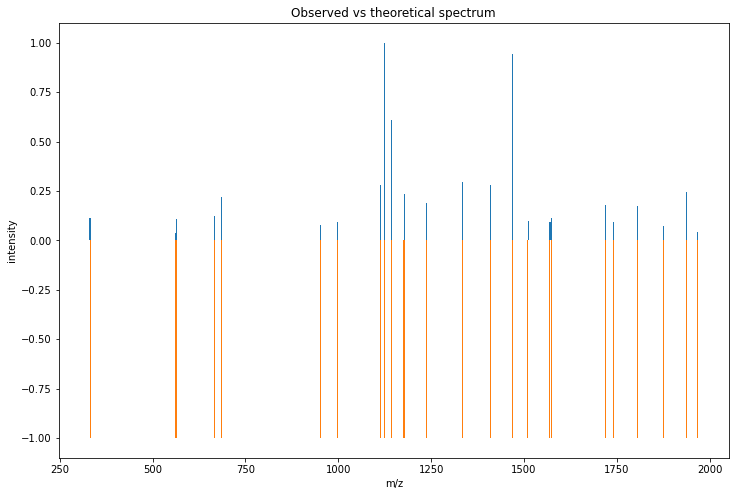

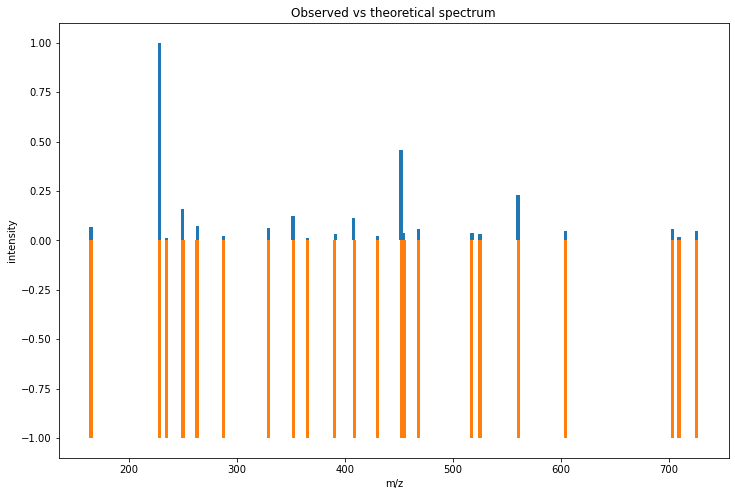

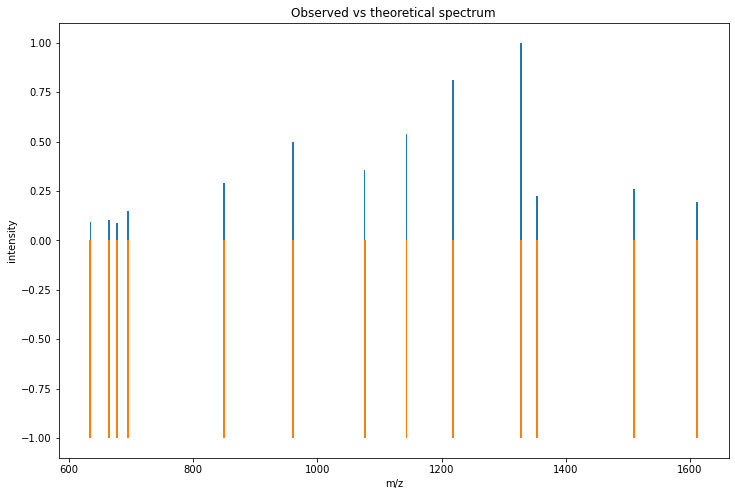

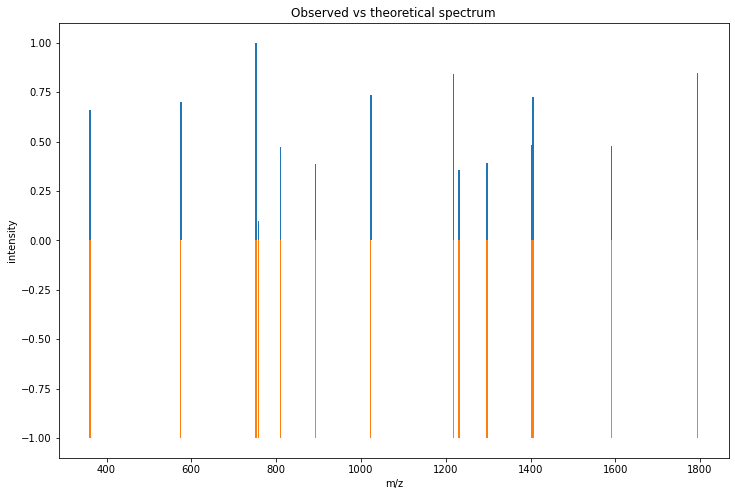

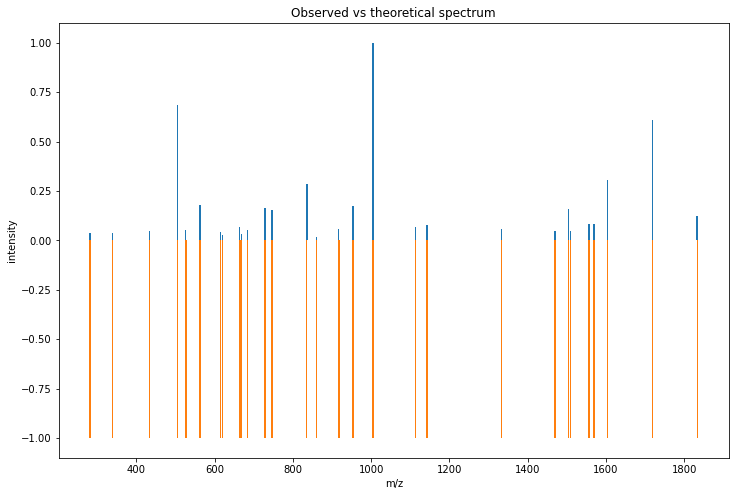

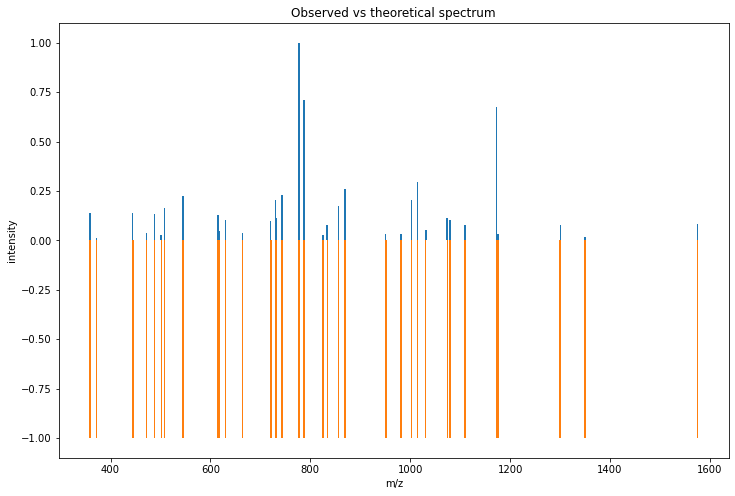

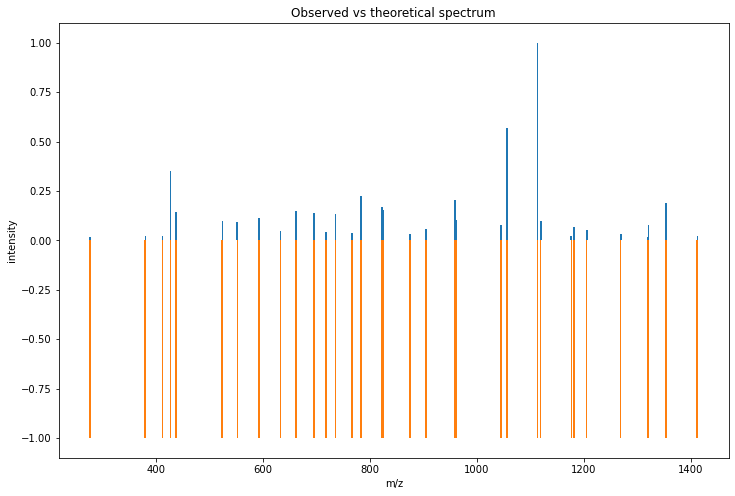

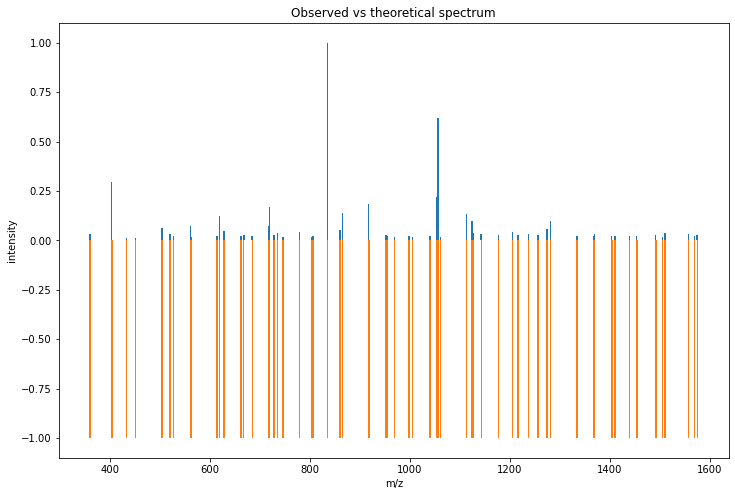

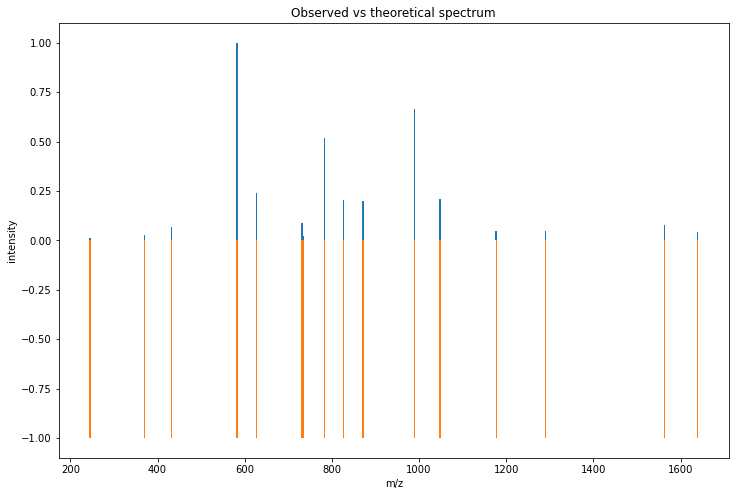

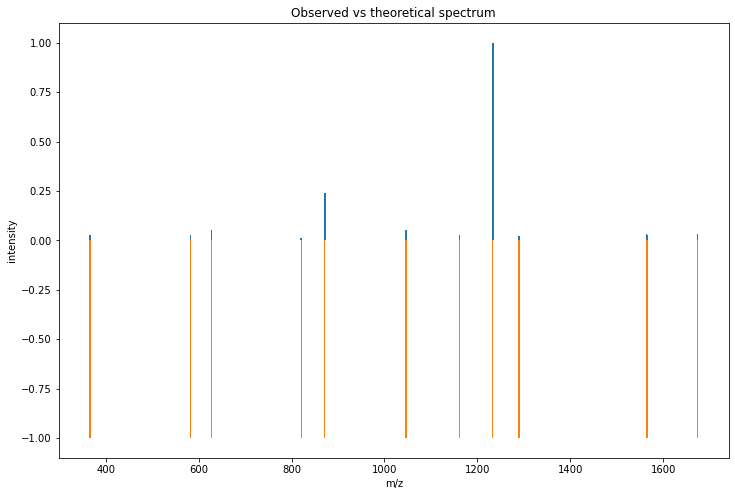

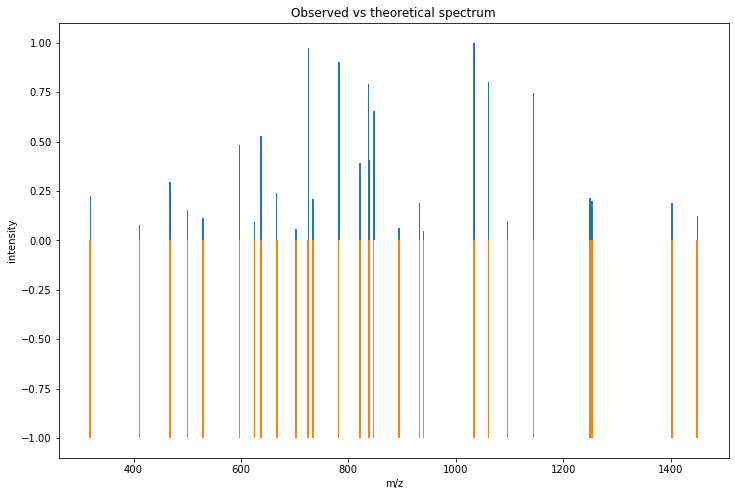

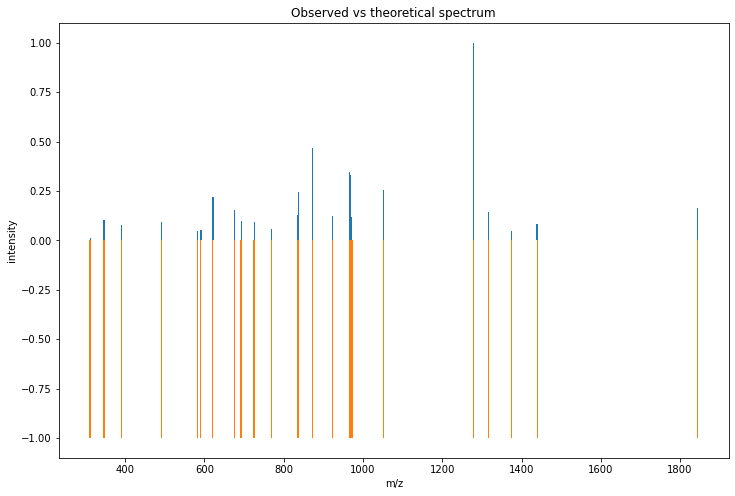

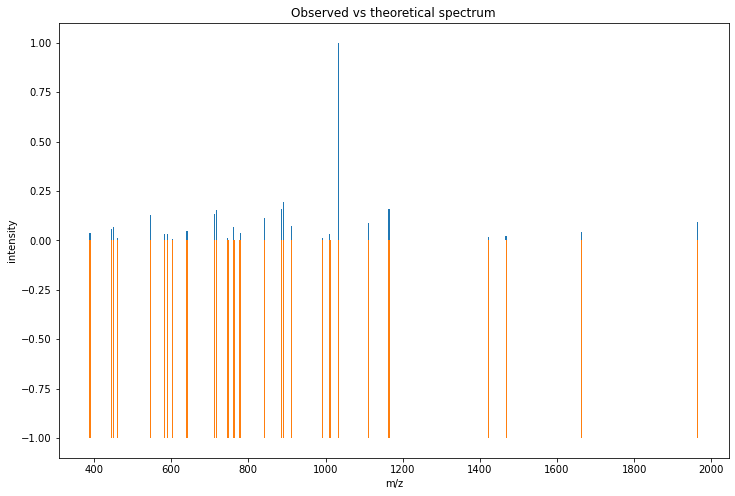

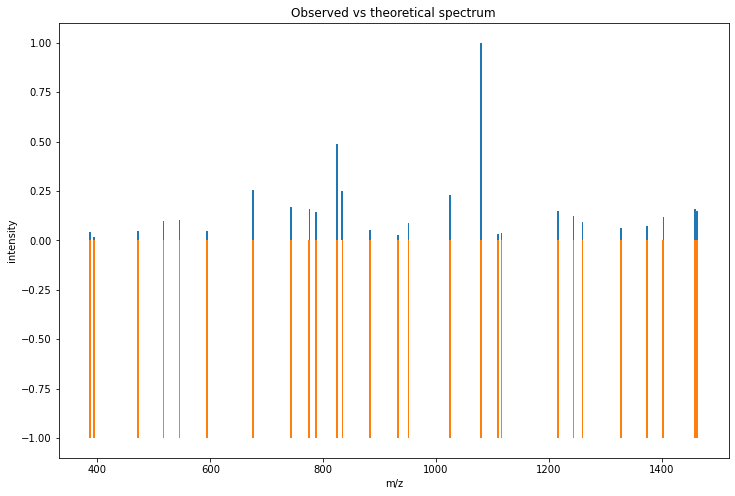

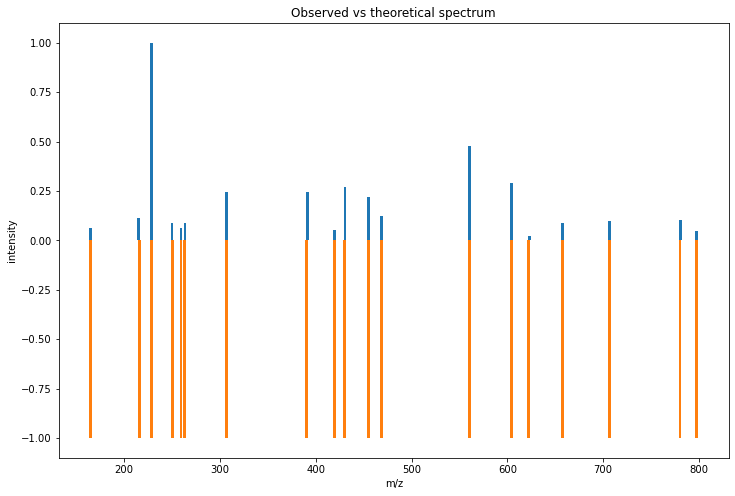

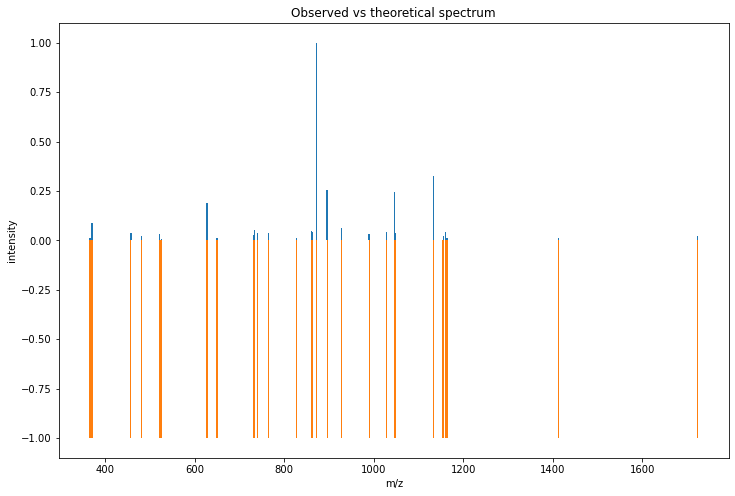

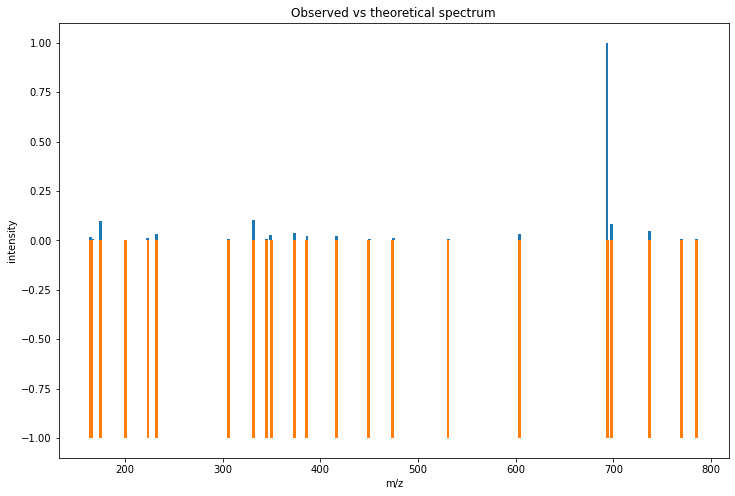

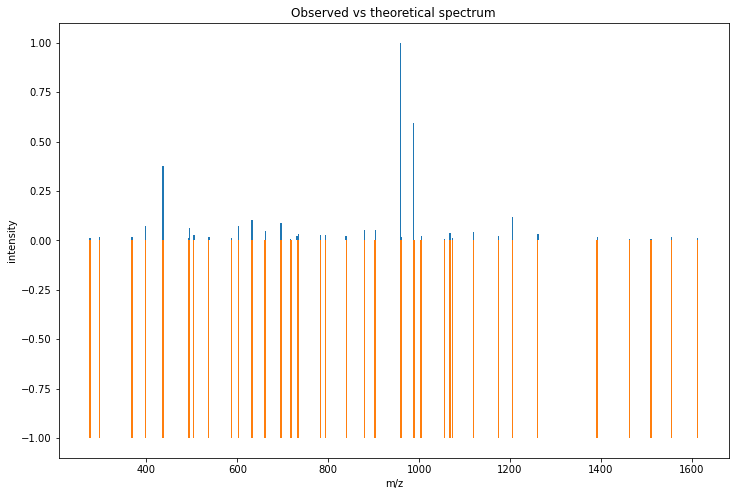

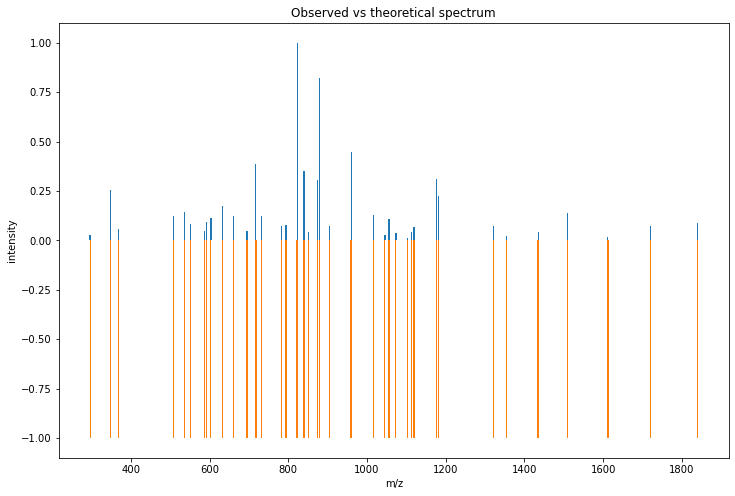

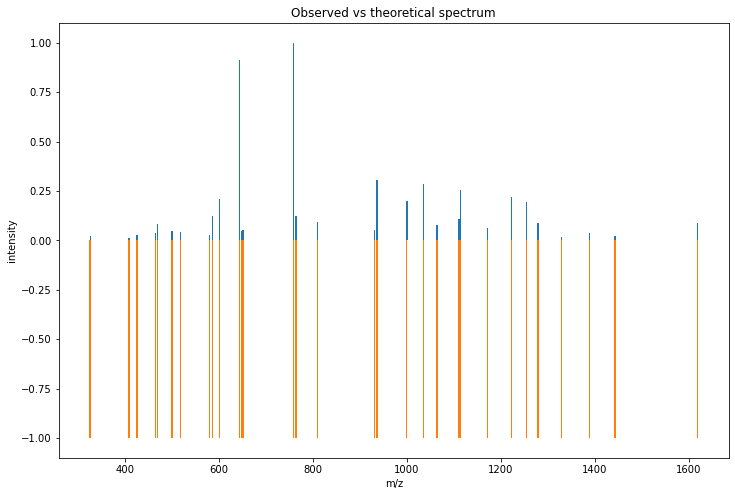

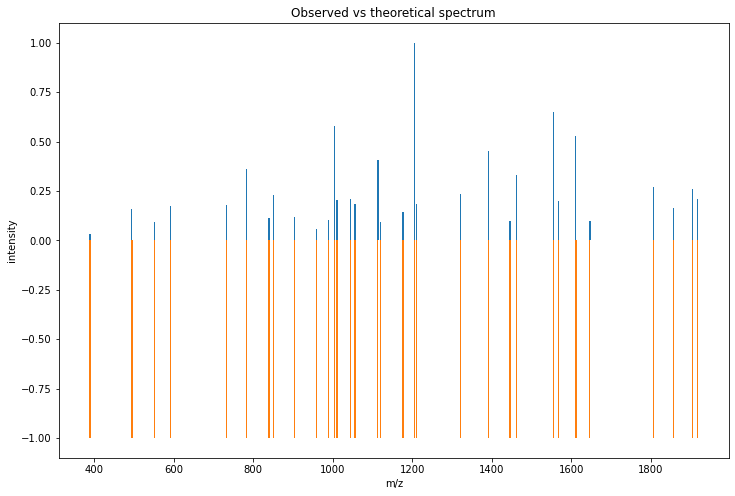

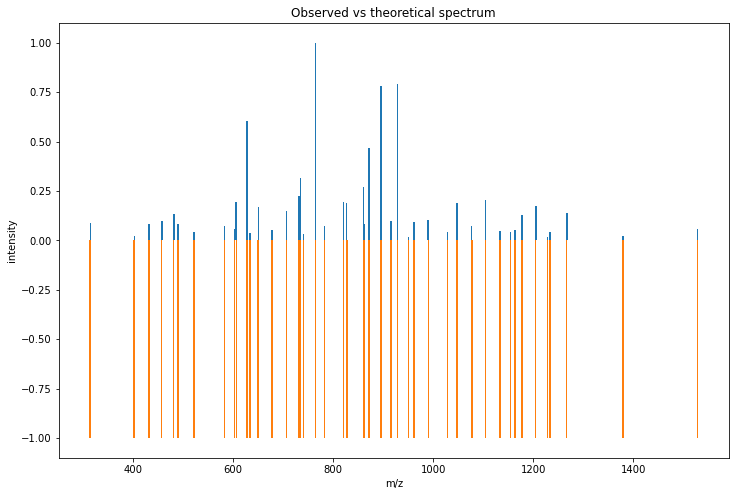

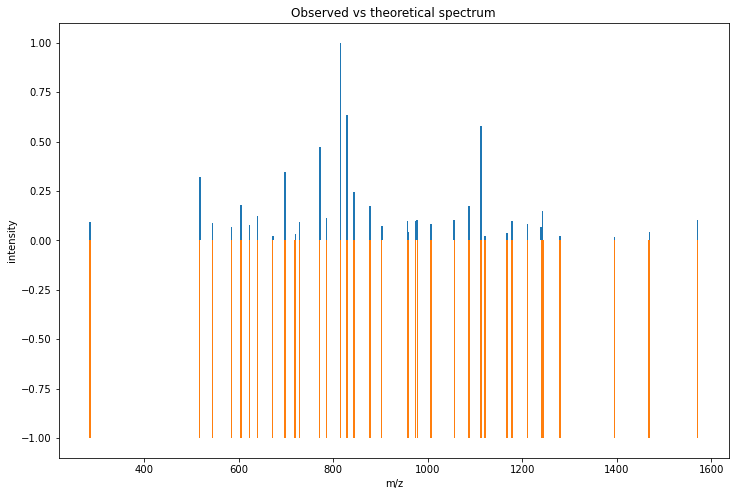

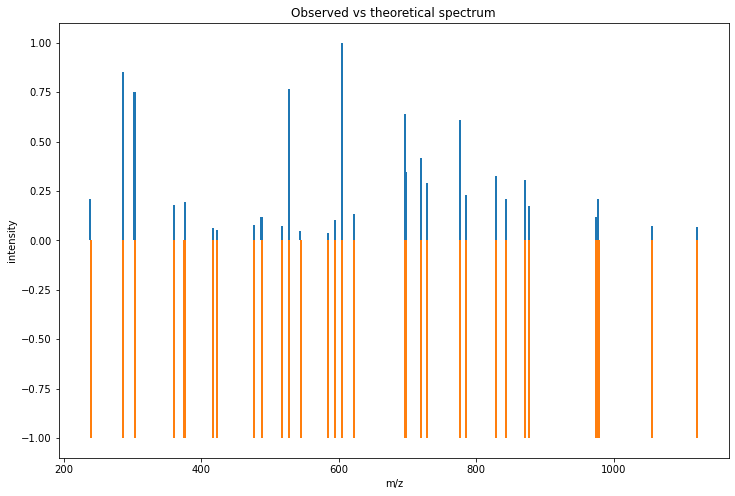

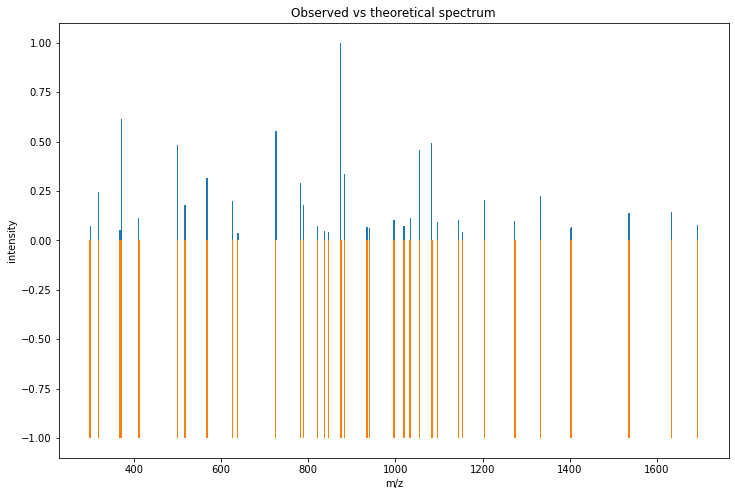

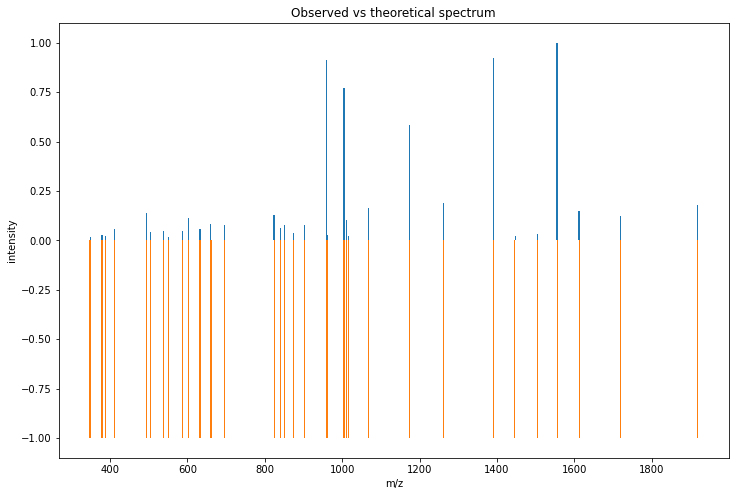

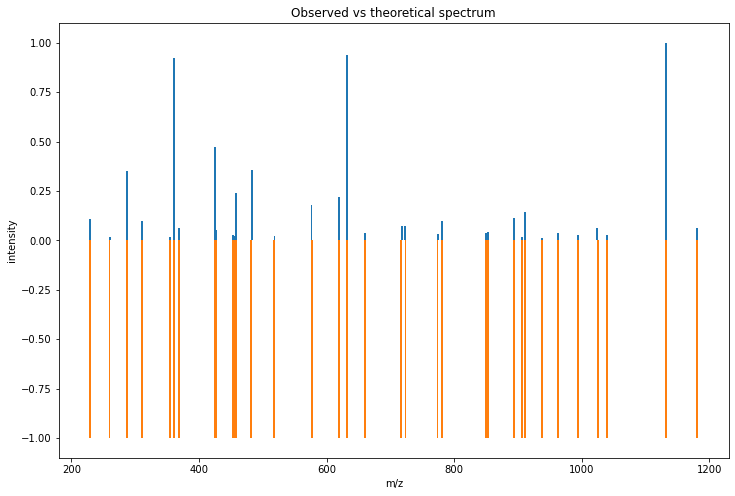

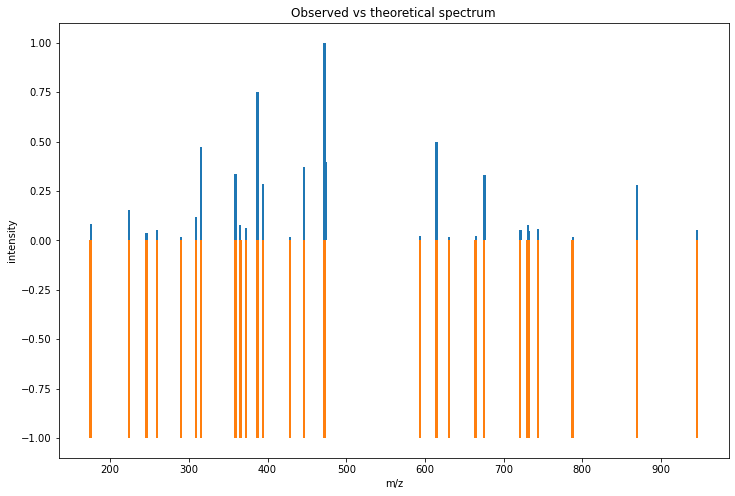

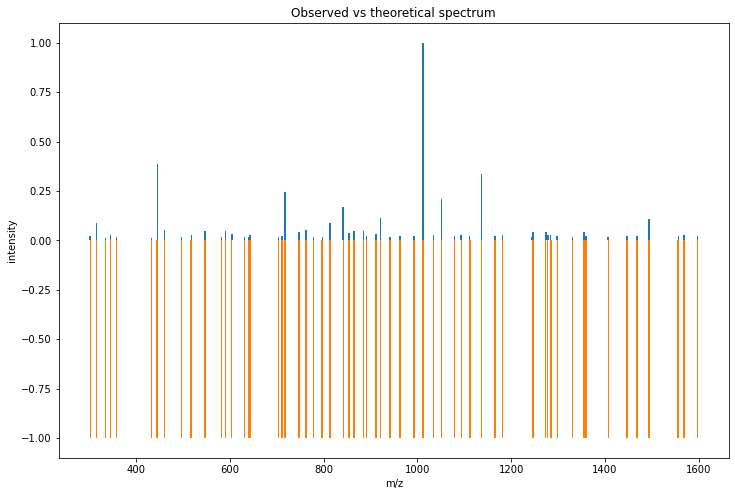

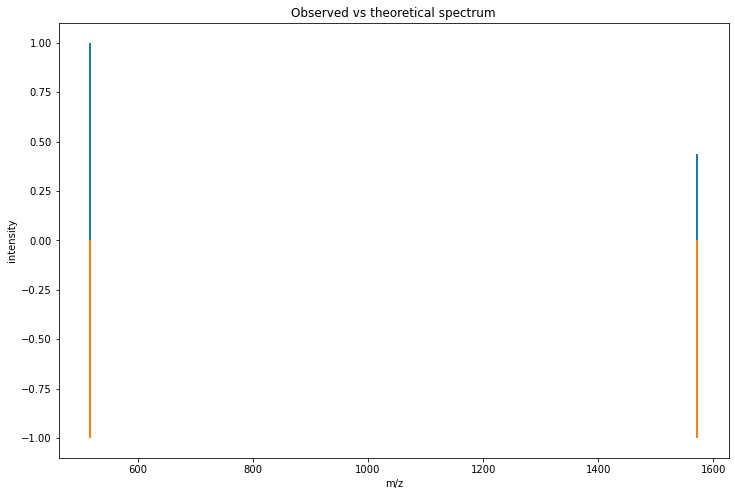

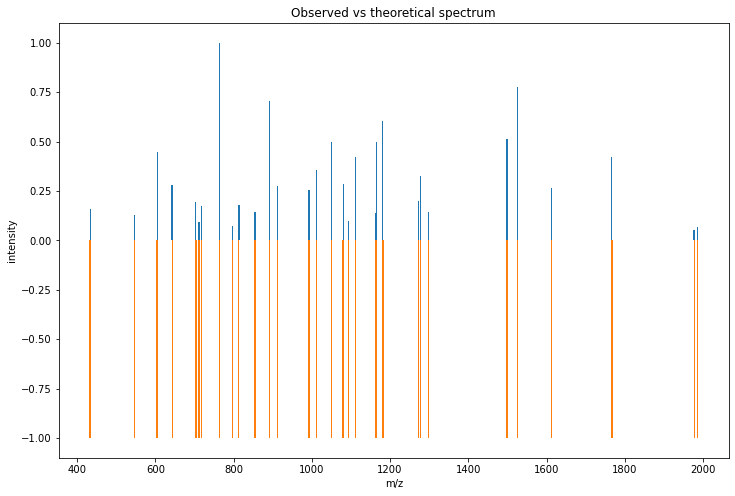

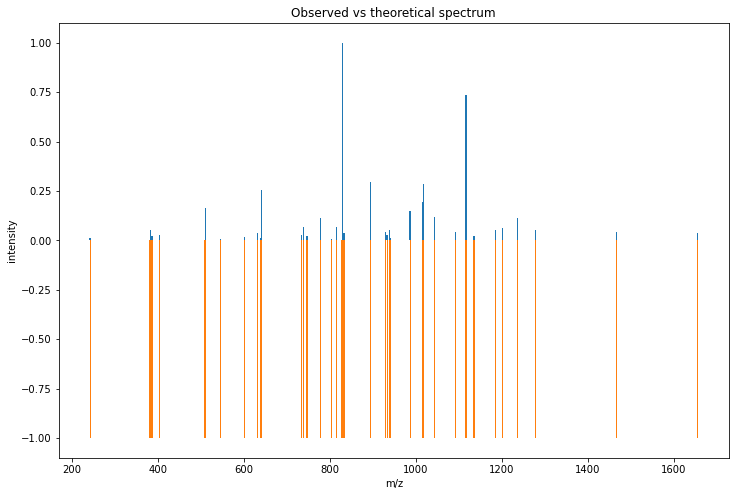

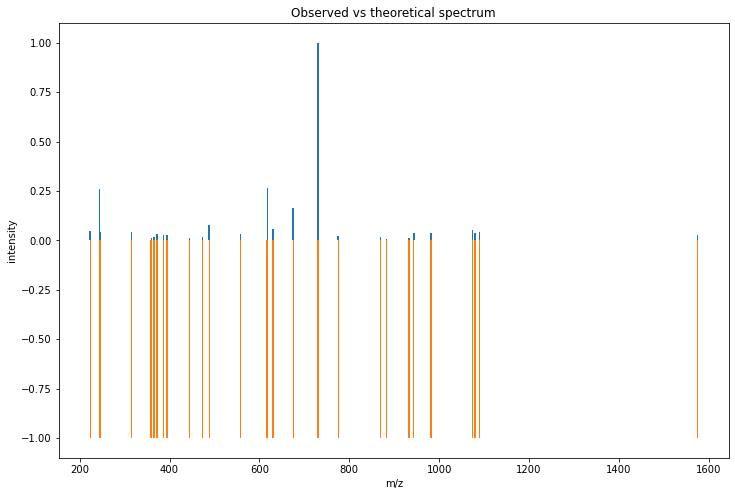

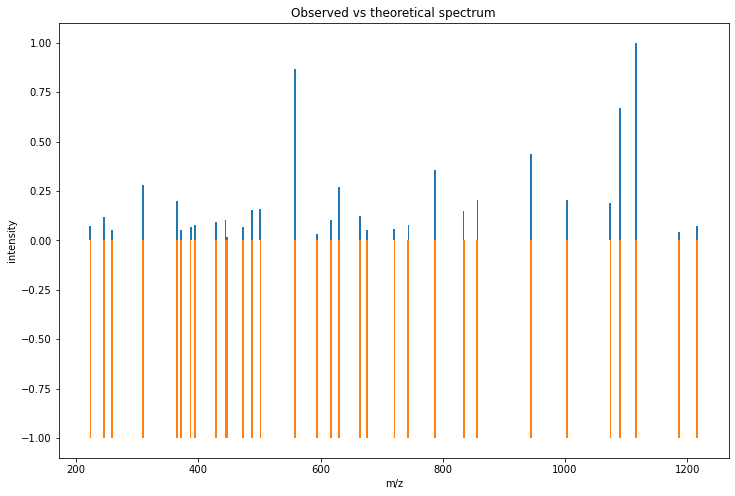

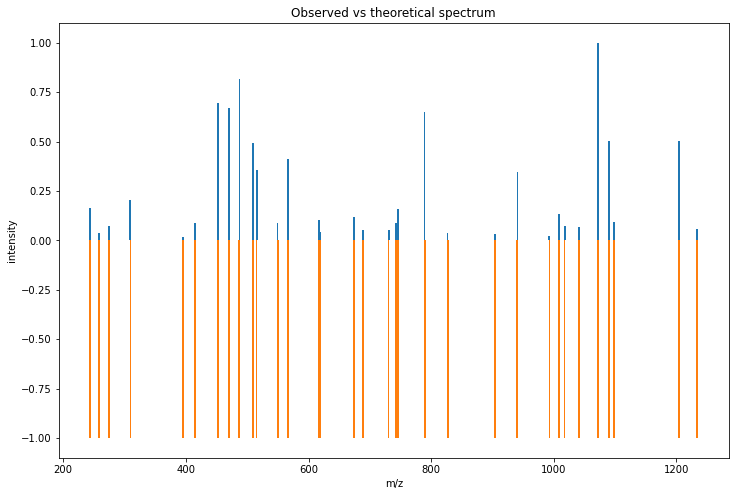

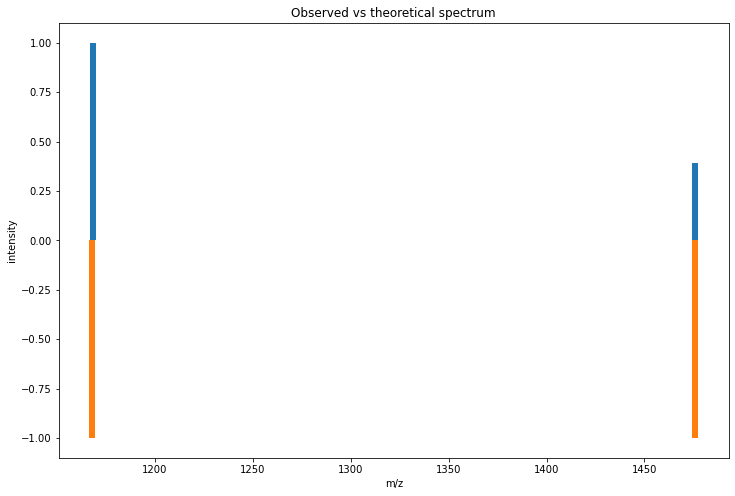

In [9]:
exp=MSExperiment()
MzMLFile().load("260.mzML",exp)
spectra=exp.getSpectra()

for e in range(0,50):
    print("_"*100)
    observed_spec=spectra[e]
    max1=0
    for i in listofpeptide:
        tsg=TheoreticalSpectrumGenerator()
        theo_spectrum=MSSpectrum()
        p=tsg.getParameters()
        p.setValue("add_y_ions","true")
        p.setValue("add_b_ions","true")
        p.setValue("add_metainfo","true")
        tsg.setParameters(p)
        peptide=AASequence.fromString(i.toString())
        tsg.getSpectrum(theo_spectrum,peptide,1,2)
        alignment=[]
        spa=SpectrumAlignment()
        p=spa.getParameters()
        p.setValue("tolerance",0.5)
        p.setValue("is_relative_tolerance","false")
        spa.setParameters(p)
        spa.getSpectrumAlignment(alignment,theo_spectrum,observed_spec)
        if(max1<len(alignment)):
            max1=len(alignment)
            pep=i
            theo_spectrumfinal=MSSpectrum()
            theo_spectrumfinal=theo_spectrum
            alignmentfinal=[]
            alignmentfinal=alignment[:]
            
    obs_mz,obs_int=observed_spec.get_peaks()
    print("Number of matched peaks:"+str(len(alignmentfinal)))
    print(pep)
    print(min(obs_mz))
    print(max(obs_mz))

    
    theo_mz,theo_int,obs_mz,obs_int=[],[],[],[]
    for theo_idx,obs_idx in alignmentfinal:
        theo_mz.append(theo_spectrumfinal[theo_idx].getMZ())
        theo_int.append(theo_spectrumfinal[theo_idx].getIntensity())
        obs_mz.append(observed_spec[obs_idx].getMZ())
        obs_int.append(observed_spec[obs_idx].getIntensity())
        
    
    title='Observed vs theoretical spectrum'
    if(max(obs_int)==0):
        print("there is no intensity in the match peak")
    else:
        mirror_plot(obs_mz,obs_int,theo_mz,theo_int,title)


# SECOND 10 SPEC